<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/advanced-machine-learning-for-finance/blob/main/2022/1-notebooks/chapter-3-4.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [26]:
import os
import sys
import math
import pandas as pd
import numpy as np

from pickle import load
from tensorflow import keras

# NN Heston Model - How to use a Trained Model

## Auxiliary Functions

In [27]:
def show_scattered( y, t, tag, ax = None):

    xMin = min(t)
    xMax = max(t)
    v    = np.arange(xMin, xMax, (xMax-xMin)/100.)

    diff   = np.fabs(y - t)
    print("@ %-24s: E[y-t]: %.6f Std(y-t): %.6f" %( tag, np.mean(diff), np.std(diff)))
    if ax == None: return

    ax.plot( y, t, ".")
    ax.plot( v, v, color="red")
    ax.set_title("%s mae=%8.4f, std=%8.4f" %(tag, np.mean(diff), np.std(diff)))
    ax.set_xlabel("predicted")
    ax.set_ylabel("target")

## Constants

In [39]:
TAG = '10000_VFA'

workDir    = 'c:/data/'

inFile     = "test_%s.csv" % (TAG)
outFile    = "pred_%s.csv" % TAG
scalerFile = "scaler_%s.pkl" %TAG
mdlDir     = "model_%s.keras" %TAG

inFile     = os.path.join(workDir, inFile)
outFile    = os.path.join(workDir, outFile)
scalerFile = os.path.join(workDir, scalerFile)
mdlDir     = os.path.join(workDir, mdlDir)

print('Test File       : ', inFile)
print('Prediction File : ', outFile)
print('Scaler          : ', scalerFile)
print('Model           : ', mdlDir)

Test File       :  c:/data/test_10000_VFA.csv
Prediction File :  c:/data/pred_10000_VFA.csv
Scaler          :  c:/data/scaler_10000_VFA.pkl
Model           :  c:/data/model_10000_VFA.keras


## Reading Challenge Data and Trained Model

In [40]:
# Read in data to predict
print("@ %-24s: reading db from '%s'" %("Info", inFile))
db = pd.read_csv(inFile, sep=',')
print(db.head(5))

@ Info                    : reading db from 'c:/data/test_10000_VFA.csv'
    k=0.800   k=0.825   k=0.850   k=0.875   k=0.900   k=0.925   k=0.950  \
0  0.699858  0.699374  0.698909  0.698463  0.698034  0.697620  0.697222   
1  0.679454  0.676550  0.673773  0.671118  0.668580  0.666155  0.663839   
2  0.310343  0.308666  0.307031  0.305436  0.303879  0.302357  0.300871   
3  0.547354  0.545410  0.543533  0.541718  0.539962  0.538264  0.536619   
4  0.681552  0.680506  0.679549  0.678678  0.677886  0.677170  0.676525   

    k=0.975   k=1.000   k=1.025   k=1.050   k=1.075   k=1.100   k=1.125  \
0  0.696838  0.696467  0.696110  0.695764  0.695430  0.695106  0.694793   
1  0.661627  0.659515  0.657501  0.655580  0.653750  0.652006  0.650346   
2  0.299417  0.297995  0.296603  0.295241  0.293907  0.292600  0.291319   
3  0.535026  0.533482  0.531985  0.530532  0.529123  0.527756  0.526428   
4  0.675946  0.675431  0.674975  0.674575  0.674227  0.673929  0.673677   

    k=1.150   k=1.175    

In [41]:
# load the model from file
print("@ %-24s: loading model from directory '%s'" %("Info", mdlDir))
model = keras.models.load_model(mdlDir)

@ Info                    : loading model from directory 'c:/data/model_10000_VFA.keras'


In [42]:
scaler = load(open(scalerFile, 'rb'))
X = scaler.transform(db)

## Using the Trained Model to Predict

In [43]:
Y = model.predict(X)
Ydb = pd.DataFrame({"Price": Y[:,0]})

Ydb.to_csv(outFile, sep=',', float_format="%.6f", index=False)
print("@ %-24s: predictions written to '%s'" %("Info", outFile))

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
@ Info                    : predictions written to 'c:/data/pred_10000_VFA.csv'


In [44]:
Y = np.ravel(Y)
print(Y.shape)

(3300,)


## Check Results

In [45]:
refFile = 'trgt_%s.csv' % (TAG)
resFile = 'test_%s.jpg' % (TAG)
refFile = os.path.join(workDir, refFile)
resFile = os.path.join(workDir, resFile)
# read target file
t = pd.read_csv(refFile, sep=',')["Price"]
print(t.shape)

(3300,)


In [46]:
# the absolute error
x = np.fabs(Y-t)

# MAE: mean absolute error
m = np.mean(x)

# STD of absolute error
st = np.std(x)

@ 10000_VFA               : E[y-t]: 0.008323 Std(y-t): 0.008524
@ challenge file, saved to 'c:/data/test_10000_VFA.jpg'


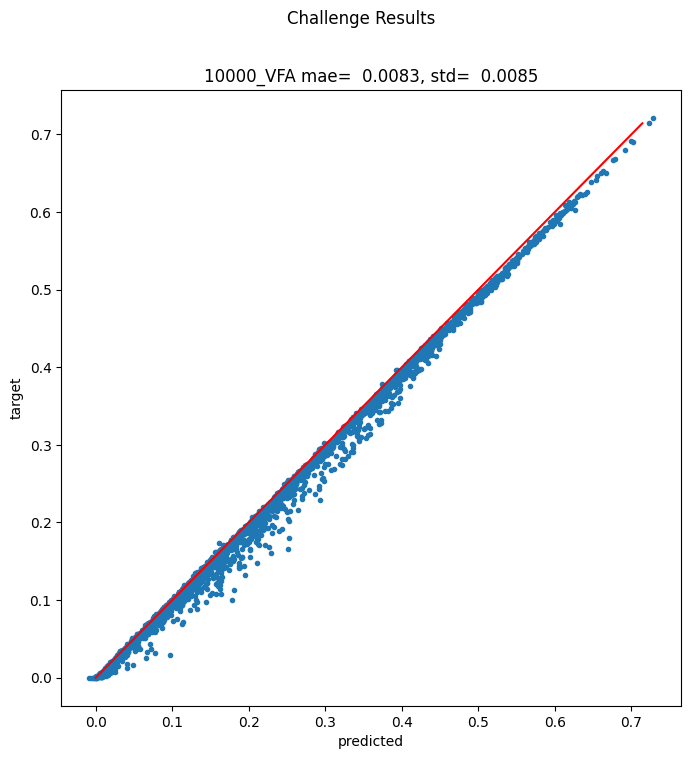

In [47]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

fit = False
if fit: 
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ox = ax[0]
    ux = ax[1]
else  : 
    fig, ax = plt.subplots(1,1, figsize=(8,8))   
    ox = ax
    ux = None

show_scattered(Y, t, TAG, ox)

if not ux == None: 
    df = pd.read_csv(refFile, sep=',')
    k  = df["Strike"]
    t  = df["Price"]
    ux.set_title("%s:  mae=%6.4f, std=%6.4f" %(TAG, m, st))
    ux.plot( k, t, ".", label="mkt")
    ux.plot( k, y, ".", label="NN")
    ux.set_xlabel("Strike")
    ux.set_ylabel("Price")
    ux.legend(loc="best")

fig.suptitle("Challenge Results")

print("@ challenge file, saved to '%s'" %(resFile))
plt.savefig(resFile, format="png")
plt.show()
